In [ ]:
import numpy as np
import control

import kontrol.core.frequency_series.frequency_series
import kontrol.core.frequency_series.noise_models
import kontrol.controlutils

np.random.seed(123)

f = np.linspace(1e-1, 1e2, 1000)
s = 1j*2*np.pi*f

##  Lag filter at 1 & 10 Hz.
tf = (s/(2*np.pi*10) + 1)/(s/(2*np.pi*1) + 1)
x = abs(tf)

fs = kontrol.core.frequency_series.frequency_series.FrequencySeries(f, x)

def model(f, f1, f2):
    s = 1j*2*np.pi*f
    tf = (s/(2*np.pi*f2) + 1)/(s/(2*np.pi*f1) + 1)
    x = abs(tf)
    return x

fs.fit_empirical(model=model, optimizer_kwargs={"options":{"maxfev":1000000}})
fs.fit_zpk(order=1)
fs.fit_tf()

In [5]:
tf_correct = control.tf([1/(2*np.pi*10), 1], [1/(2*np.pi*1), 1])
kontrol.controlutils.check_tf_equal(tf_correct, fs.tf)

True

True

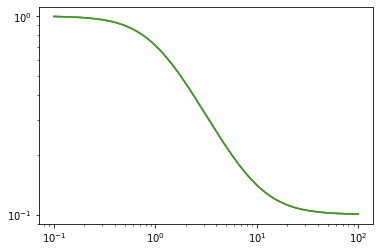

In [69]:
import matplotlib.pyplot as plt

plt.loglog(f, x)
# plt.loglog(fs.f, fs.x_empirical, "o")

# plt.loglog(fs._f_processed, model(fs._f_processed, 1, 10), "o")
plt.loglog(fs.f_zpk, abs(fs.x_zpk))
plt.loglog(fs.f_tf, abs(fs.x_tf))

In [54]:
np.isclose(f[1]-f[0], f[2]-f[1])

True

In [26]:
np.allclose(fs.args_empirical_model, [1,10])

True

In [27]:
fs.args_empirical_model

array([1.        , 9.99999996])